softmax classifier for MNIST : accuracy about 89%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 5.870527597
Epoch: 0002, Cost: 1.802985958
Epoch: 0003, Cost: 1.148753222
Epoch: 0004, Cost: 0.904760163
Epoch: 0005, Cost: 0.769922458
Epoch: 0006, Cost: 0.682201275
Epoch: 0007, Cost: 0.619571125
Epoch: 0008, Cost: 0.572113773
Epoch: 0009, Cost: 0.534714068
Epoch: 0010, Cost: 0.505436317
Epoch: 0011, Cost: 0.481393915
Epoch: 0012, Cost: 0.460109945
Epoch: 0013, Cost: 0.443600857
Epoch: 0014, Cost: 0.428196668
Epoch: 0015, Cost: 0.414990729
Learning Finished!
Accuracy: 0.8979
Label:  [0]
Prediction:  [0]


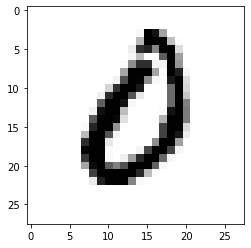

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))

learning_rate = 0.001
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=hypothesis, labels=tf.stop_gradient(Y)
    )
)
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


with tf.Session() as sess:
   
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost = 0

        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print(f"Epoch: {(epoch + 1):04d}, Cost: {avg_cost:.9f}")

    print("Learning Finished!")

    print(
        "Accuracy:",
        sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}),
    )

    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], axis=1)))
    print(
        "Prediction: ",
        sess.run(
            tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r : r + 1]}
        ),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

MNIST_NN basic model : accuracy about 95%

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 4.580062651
Epoch: 0002 cost = 1.051383912
Epoch: 0003 cost = 0.627070453
Epoch: 0004 cost = 0.423753840
Epoch: 0005 cost = 0.305093316
Epoch: 0006 cost = 0.237545195
Epoch: 0007 cost = 0.184901160
Epoch: 0008 cost = 0.164090974
Epoch: 0009 cost = 0.117793394
Epoch: 0010 cost = 0.123670034
Epoch: 0011 cost = 0.080514019
Epoch: 0012 cost = 0.082344994
Epoch: 0013 cost = 0.095060341
Epoch: 0014 cost = 0.077608804
Epoch: 0015 cost = 0.075805088
Learning Finished!
Accuracy: 0.9574
Label:  [9]
Prediction:  [9]


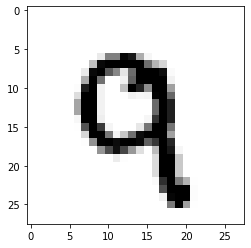

In [0]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


learning_rate = 0.001
training_epochs = 15
batch_size = 100

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1, W2) + b2)

w3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(l2, w3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {x: batch_xs, y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

MNiST_XAVIER INITIALIZER : accuracy about 97%

In [0]:
import tensorflow as tf
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) 
tf.reset_default_graph() #변수 초기화
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

w1 = tf.get_variable("W1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
l1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w2 = tf.get_variable("W2", shape=[256, 256],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
l2 = tf.nn.relu(tf.matmul(l1, w2) + b2)

w3 = tf.get_variable("W3", shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(l2, w3) + b3

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {x: batch_xs, y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={x: mnist.test.images[r:r + 1]}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost = 0.305121149
Epoch: 0002 cost = 0.112256705
Epoch: 0003 cost = 0.071980258
Epoch: 0004 cost = 0.052765903
Epoch: 0005 cost = 0.040416910
Epoch: 0006 cost = 0.028990819
Epoch: 0007 cost = 0.023480822
Epoch: 0008 cost = 0.019599668
Epoch: 0009 cost = 0.015838867
Epoch: 0010 cost = 0.013948995
Epoch: 0011 cost = 0.016161934
Epoch: 0012 cost = 0.011546252
Epoch: 0013 cost = 0.008653808
Epoch: 0014 cost = 0.008328862
Epoch: 0015 cost = 0.012454723
Learning Finished!
Accuracy: 0.9775
Label:  [2]
Prediction:  [2]
